In [6]:
from learned_ctrlr_opt.systems.mob_locomotion import Go1HiddenParamsTest, Go1HiddenParamsTrain
import numpy as np
from learned_ctrlr_opt.utils.experiment_utils import *
from learned_ctrlr_opt.systems.car_dynamics import CarParams, CarParamsTrain, CarParamsTest
from learned_ctrlr_opt.systems.car_controller import CarControllerParams
from learned_ctrlr_opt.systems.robots import TopDownCar, TopDownCarResetFree, TopDownCarRandomStartingState
from learned_ctrlr_opt.systems.quadrotor_geom import CrazyFlieParamsTest, CrazyFlieParamsTrain, CrazyFlieParams
from learned_ctrlr_opt.systems.branin import *
from learned_ctrlr_opt.systems.hartmann import *
from learned_ctrlr_opt.utils.dataset_utils import denormalize, normalize
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create a Test Set only sweeping friction

In [12]:
print(CarParamsTrain.get_bounds())
frictions = np.array([200, 210, 240, 300, 400, 460, 480, 500])
print(frictions)

[[1.0e-02 3.0e-02]
 [2.5e+04 4.5e+04]
 [2.5e+02 4.5e+02]
 [1.6e+00 1.6e+00]
 [0.0e+00 8.0e-02]
 [2.0e+02 3.5e+02]]
[200 210 240 300 400 460 480 500]


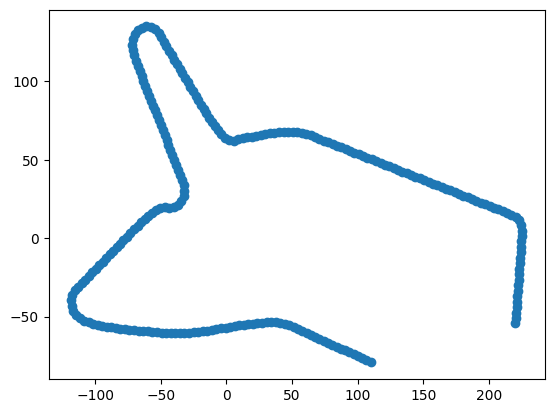

In [15]:
# track_seed = 10002
# track_seed = 32
track_seed = 90
robot = TopDownCar(track_seed, length=250)
track = np.array(robot.get_track())
plt.scatter(track[:,0], track[:,1])

In [16]:
tasks = np.array([1, 32, 90])  # should I have multiple tracks in this??
param_arrays = np.array([CarParams(friction_limit=frictions[i]).get_list() for i in range(len(frictions))])
robot_kwargs = {"max_time": 1500}  # eval length is dictated by the lookahead dim of the model now
save_test_set("topdowncar", "swept_friction", param_arrays, tasks, robot_kwargs)

In [17]:
params, tasks, robot_kwargs = load_test_set("topdowncar", "swept_friction")

In [4]:
print(CarParams.get_bounds())

[[5.0e-03 4.0e-02]
 [2.0e+04 5.0e+04]
 [2.0e+02 5.0e+02]
 [1.6e+00 1.6e+00]
 [0.0e+00 8.0e-02]
 [2.0e+02 3.5e+02]]


# Create a Test Set only sweeping size

In [3]:
sizes = [0.003, 0.004, 0.005, 0.007, 0.01, 0.02, 0.03, 0.035, 0.04]
tasks = np.array([1, 32, 90])
param_arrays = np.array([CarParams(size=sizes[i]).get_list() for i in range(len(sizes))])
robot_kwargs = {"max_time": 1500}  # eval length is dictated by the lookahead dim of the model now
save_test_set("topdowncar", "swept_size", param_arrays, tasks, robot_kwargs)

# Create test set with random param variations

In [4]:
param_arrays = np.array([CarParamsTest.generate_random([0,1,2], half=i<8).get_list() for i in range(16)])
# param_arrays[0,0] = 0.002
# param_arrays[1,0] = 0.05
# param_arrays[2,1] = 15000
# param_arrays[3,1] = 55000
# param_arrays[4,2] = 150
# param_arrays[5,2] = 550

# param_arrays[6,[0,1,2]] = np.array([0.004, 15000, 550])
# param_arrays[7,[0,1,2]] = np.array([0.05, 55000, 550])
# param_arrays[8,[0,1,2]] = np.array([0.05, 55000, 150])
# param_arrays[9,[0,1,2]] = np.array([0.002, 55000, 400])

tasks = np.array([10001, 10002, 10003, 10004, 10005, 10006])
robot_kwargs = {"max_time": 1500}  # eval length is dictated by the lookahead dim of the model now
save_test_set("topdowncar", "ood_tasks_4", param_arrays, tasks, robot_kwargs)

In [20]:
print(param_arrays)

[[6.19422511e-03 2.39796719e+04 2.23187392e+02 1.60000000e+00
  2.00000000e-02 3.00000000e+02]
 [8.53703681e-03 2.37161707e+04 2.48795167e+02 1.60000000e+00
  2.00000000e-02 3.00000000e+02]
 [9.19249459e-03 2.49847885e+04 2.15667567e+02 1.60000000e+00
  2.00000000e-02 3.00000000e+02]
 [7.85002989e-03 2.40279927e+04 2.41760321e+02 1.60000000e+00
  2.00000000e-02 3.00000000e+02]
 [9.63286324e-03 2.41289999e+04 2.07303949e+02 1.60000000e+00
  2.00000000e-02 3.00000000e+02]
 [9.19758973e-03 2.43449589e+04 2.10331644e+02 1.60000000e+00
  2.00000000e-02 3.00000000e+02]
 [3.52248669e-02 4.69327687e+04 4.73217724e+02 1.60000000e+00
  2.00000000e-02 3.00000000e+02]
 [3.66046731e-02 4.67434882e+04 4.81432831e+02 1.60000000e+00
  2.00000000e-02 3.00000000e+02]
 [8.18346170e-03 4.91130133e+04 4.98564327e+02 1.60000000e+00
  2.00000000e-02 3.00000000e+02]
 [3.66200982e-02 2.49509352e+04 4.60584180e+02 1.60000000e+00
  2.00000000e-02 3.00000000e+02]
 [3.50703885e-02 4.88516216e+04 2.45358580e+02 1.6

In [23]:
print(CarControllerParams().get_list())

[ 0.1  0.2  0.1  0.1 75.   0.4 20.  20. ]


In [24]:
param_arrays = np.array([CarParamsTest().get_list()])
track_seeds = [1]
robot_kwargs = {"max_time": 1500}  # eval length is dictated by the lookahead dim of the model now
save_test_set("topdowncar", "dummy", param_arrays, track_seeds, robot_kwargs)

# Create OOD Crazyflie Params Dataset

In [58]:
param_arrays = np.array([CrazyFlieParamsTest.generate_random([0,1,2,3,4], half=i<8).get_list() for i in range(16)])

# Hummingbird Quadrotor Params - very OOD from training dataset
param_arrays[-1,:] = np.array([0.15, 3.65e-3, 3.68e-3, 7e-3, 2e-6])

# define trajectories
radii = np.array([[[1, 1, 1], 
                 [2, 2, 2],
                 [0.5, 0.5, 0]]])
centers = np.array([[[1, 0, 0],
                   [0, 1, 0],
                   [0, 0, 1]]])
frequencies = np.array([[[0.5, 0.5, 0.5],
                       [0.5, 0.5, 0.5],
                       [0.5, 0.5, 0.5]]])
task_params = np.vstack([radii, centers, frequencies])
robot_kwargs = {"t_f": 3}
save_test_set("crazyflie", "ood_params_1", param_arrays, task_params, robot_kwargs)

# Crazyflie OOD Params, Easier Trajs Dataset

In [9]:
param_arrays = np.array([CrazyFlieParamsTest.generate_random([0,1,2,3,4], half=False).get_list() for i in range(5)])

# Hummingbird Quadrotor Params - very OOD from training dataset
# param_arrays[-1,:] = np.array([0.15, 3.65e-3, 3.68e-3, 7e-3, 2e-6])

# define trajectories
radii = np.array([[[1, 1, 1], 
                 [2, 2, 2],
                 [0.5, 0.5, 0]]])
centers = np.array([[[1, 0, 0],
                   [0, 1, 0],
                   [0, 0, 1]]])
frequencies = np.array([[[0.2, 0.2, 0.2],
                       [0.15, 0.15, 0.15],
                       [0.15, 0.15, 0.15]]])
task_params = np.vstack([radii, centers, frequencies])
robot_kwargs = {"t_f": 3}
save_test_set("crazyflie", "ood_params_3", param_arrays, task_params, robot_kwargs)

# Crazyflie ID Params

In [3]:
# create params that are close to crazyflie's params
crazyflie_params = normalize(CrazyFlieParams().get_list(), CrazyFlieParams.get_bounds())
param_arrays = [denormalize(crazyflie_params, CrazyFlieParams.get_bounds())]
for i in range(15):
    noise = np.random.rand(5) * 5e-2
    params_modded = denormalize(crazyflie_params + noise, CrazyFlieParams.get_bounds())
    while not CrazyFlieParams.ensure_flies(params_modded[0], 2500, params_modded[-1]):
        noise = np.random.rand(5) * 5e-2
        params_modded = denormalize(crazyflie_params + noise, CrazyFlieParams.get_bounds())
    param_arrays.append(params_modded)

# param_arrays = np.array([CrazyFlieParamsTrain.generate_random([0,1,2,3,4]).get_list() for i in range(15)])

# Hummingbird Quadrotor Params - very OOD from training dataset
# param_arrays[-1,:] = np.array([0.15, 3.65e-3, 3.68e-3, 7e-3, 2e-6])

# define trajectories
radii = np.array([[[1, 1, 1], 
                 [2, 2, 2],
                 [0.5, 0.5, 0]]])
centers = np.array([[[1, 0, 0],
                   [0, 1, 0],
                   [0, 0, 1]]])
frequencies = np.array([[[0.3, 0.3, 0.3],
                       [0.3, 0.3, 0.3],
                       [0.3, 0.3, 0.3]]])
task_params = np.vstack([radii, centers, frequencies])
robot_kwargs = {"t_f": 3}
save_test_set("crazyflie", "id_params_3", np.array(param_arrays), task_params, robot_kwargs)

In [41]:
print(param_arrays)

[array([3.00e-02, 1.43e-05, 1.43e-05, 2.89e-05, 2.30e-08]), array([3.00959372e-02, 8.62776985e-05, 1.69263755e-04, 1.54744630e-04,
       5.06043683e-08]), array([3.45606931e-02, 5.27751341e-05, 1.81976858e-04, 1.65777850e-04,
       1.18338801e-07]), array([3.26075937e-02, 1.16919039e-04, 7.28630524e-05, 9.31786859e-05,
       2.06962012e-07]), array([4.68670080e-02, 1.93624944e-04, 1.96305258e-05, 1.04340393e-04,
       2.15985151e-07]), array([3.49024054e-02, 1.05290589e-04, 6.85354941e-05, 1.70961817e-04,
       1.29161837e-07]), array([3.81507794e-02, 1.47429212e-05, 1.94408090e-04, 1.56280652e-04,
       9.54593191e-08]), array([4.52831864e-02, 1.84711553e-04, 5.12474485e-05, 1.92038360e-04,
       9.47968641e-08]), array([4.11430806e-02, 1.14595449e-04, 1.29036209e-04, 9.41024697e-05,
       1.72463493e-07]), array([3.42979181e-02, 1.98048341e-04, 1.54232789e-05, 1.57721084e-04,
       1.64025112e-07]), array([4.25019601e-02, 4.98849764e-05, 4.52594200e-05, 1.50813021e-04,
     

# CF ID Wind

In [4]:
# create params that are close to crazyflie's params
crazyflie_params = normalize(CrazyFlieParams().get_list(), CrazyFlieParams.get_bounds())
param_arrays = [denormalize(crazyflie_params, CrazyFlieParams.get_bounds())]
for i in range(5):
    noise = np.random.rand(5) * 1e-2
    params_modded = denormalize(crazyflie_params + noise, CrazyFlieParams.get_bounds())
    while not CrazyFlieParams.ensure_flies(params_modded[0], 4000, params_modded[-1]):
        noise = np.random.rand(5) * 1e-2
        params_modded = denormalize(crazyflie_params + noise, CrazyFlieParams.get_bounds())
    param_arrays.append(params_modded)

# param_arrays = np.array([CrazyFlieParamsTrain.generate_random([0,1,2,3,4]).get_list() for i in range(15)])

# Hummingbird Quadrotor Params - very OOD from training dataset
# param_arrays[-1,:] = np.array([0.15, 3.65e-3, 3.68e-3, 7e-3, 2e-6])

# define trajectories
radii = np.array([[[1, 1, 1], 
                 [1, 1, 1],
                 [1,1,1]]])
centers = np.array([[[1, 0, 0],
                   [1, 0, 0],
                   [1, 0, 0]]])
frequencies = np.array([[[0.3, 0.3, 0.3],
                       [0.3, 0.3, 0.3],
                       [0.3, 0.3, 0.3]]])
winds = [[0.4, 0, 0], [0.5, 0, 0], [0.3, 0.3, 0]]
task_params = np.vstack([radii, centers, frequencies])
robot_kwargs = {"t_f": 3}
save_test_set("crazyflie", "id_wind_4", np.array(param_arrays), task_params, robot_kwargs)

# Create OOD Branin Params Dataset

In [10]:
test_params_array = np.array([BraninFnParamsTest.generate_random([0, 1, 2, 3, 4, 5]).get_list() for p in range(20)])
task_optimal_locations = np.zeros((len(test_params_array), 2))
task_optimal_locations = np.zeros((len(test_params_array), 2))
task_optimal_costs = np.zeros((len(test_params_array)))
for j, task in enumerate(test_params_array):
    branin_env = Branin(BraninFnParamsTest(*task), [0,1])
    best_gain = [0,0]
    best_cost = 100
    for i in range(8192*2):
        gain = denormalize(np.random.rand(2), BraninInputs.get_bounds())
        cost = branin_env.evaluate_x(gain)
        if cost < best_cost:
            best_gain = gain
            best_cost = cost
    task_optimal_locations[j] = best_gain
    task_optimal_costs[j] = best_cost
robot_kwargs = {"optimal_locations": task_optimal_locations,
               "optimal_costs": task_optimal_costs}
save_test_set("meta_branin", "ood_params_1", test_params_array, None, robot_kwargs)

In [11]:
print(task_optimal_costs)

[0.28848417 0.28676785 0.30842757 0.28736641 0.5354215  0.54988901
 0.2436506  0.51253309 0.27061956 0.55014014 0.54394272 0.55194036
 0.26397023 0.54103216 0.56018411 0.54841329 0.54163007 0.2750704
 0.56353737 0.27608282]


# Create OOD Hartmann Params Dataset

In [16]:
test_params_array = np.array([HartmannFnParams.generate_random([0, 1, 2, 3]).get_list() for p in range(20)])
task_optimal_locations = np.zeros((len(test_params_array), 6))
task_optimal_costs = np.zeros((len(test_params_array)))
for j, task in enumerate(test_params_array):
    branin_env = Hartmann(HartmannFnParams(*task), [0,1,2,3,4,5])
    best_gain = [0,0,0,0,0,0]
    best_cost = 100
    for i in range(8192*2):
        gain = denormalize(np.random.rand(6), HartmannInputs.get_bounds())
        cost = branin_env.evaluate_x(gain)
        if cost < best_cost:
            best_gain = gain
            best_cost = cost
    task_optimal_locations[j] = best_gain
    task_optimal_costs[j] = best_cost
robot_kwargs = {"optimal_locations": task_optimal_locations,
               "optimal_costs": task_optimal_costs}
save_test_set("meta_hartmann", "ood_params_1", test_params_array, None, robot_kwargs)

In [20]:
print(task_optimal_costs)

[1.18977033e-06 2.74582399e-07 3.15206431e-06 5.63026611e-07
 1.05442828e-06 1.42977409e-06 2.54178857e-06 6.30380157e-07
 5.63453590e-07 5.06697069e-07 4.00787399e-07 8.29350637e-07
 2.03107296e-07 1.01559288e-06 6.67115921e-07 1.27828821e-06
 4.86937698e-07 1.37974422e-06 5.15076139e-07 3.35004888e-07]


In [19]:
print(test_params_array)

[[1.05971371 1.08103385 2.45336285 3.19603825]
 [1.1083501  0.87426706 2.30607451 3.04306025]
 [0.90301069 1.35701611 2.81661708 3.57889039]
 [1.00390748 1.1264909  2.19758284 3.43128292]
 [0.76796757 0.87341756 2.27357565 3.25194841]
 [0.60037121 0.78689427 2.86964183 3.50383565]
 [1.44566595 1.0544533  2.35525794 3.58076534]
 [0.65022364 1.10938088 2.95128605 2.80759754]
 [0.63929579 1.15604839 2.17018922 3.41040098]
 [1.32568315 0.91951793 2.22786946 2.81662951]
 [0.75204043 1.24935656 2.81088554 2.98994429]
 [1.17542754 0.81669051 2.01486671 3.54943838]
 [1.06693996 0.65731101 2.64569081 2.86810079]
 [0.94081887 1.22594273 2.70493793 3.1659205 ]
 [1.42178558 1.05159749 2.94286427 3.1734531 ]
 [1.30462374 1.14791963 2.69434188 2.92384184]
 [1.16140688 0.93063323 2.11401549 3.53167575]
 [1.14052423 1.2671789  2.73320829 3.02185879]
 [1.31072705 1.28185423 2.06286306 3.06873615]
 [1.4752118  1.04074033 2.1991451  2.86188534]]


# Mob Locomotion Test Set

In [45]:
print(Go1HiddenParamsTest.lower_half_bounds())
print(Go1HiddenParamsTest.upper_half_bounds())

[[-1.   -0.8 ]
 [ 0.8   0.9 ]
 [-0.6  -0.5 ]
 [ 0.05  0.1 ]
 [ 0.    0.  ]]
[[2.5 4. ]
 [1.  1.1]
 [2.5 3. ]
 [0.3 0.5]
 [0.  0. ]]


In [46]:
test_params_array = np.array([Go1HiddenParamsTest.generate_random([0, 1, 2, 3]).get_list() for i in range(15)])
print(test_params_array)

[[ 2.9441637   1.06824244  2.92676831  0.3355647   0.        ]
 [ 3.83534073  1.02445568 -0.5120868   0.37511476  0.        ]
 [ 2.75449186  1.0054114   2.54305164  0.32195616  0.        ]
 [-0.9509119   0.87309773 -0.57139991  0.06049359  0.        ]
 [-0.81635674  1.03429276 -0.52150825  0.47996054  0.        ]
 [-0.80677386  0.89953032  2.60546973  0.36075464  0.        ]
 [ 2.85850737  0.87296048  2.95989432  0.06030029  0.        ]
 [ 3.68846653  0.81205189  2.64417979  0.06770359  0.        ]
 [ 2.86975476  0.85948471 -0.56436362  0.4006408   0.        ]
 [-0.91704916  0.88522806  2.73580982  0.318328    0.        ]
 [-0.96780157  0.86661812  2.64430206  0.0812543   0.        ]
 [-0.84981937  0.8119194   2.66974097  0.09680266  0.        ]
 [-0.85673337  0.85759525 -0.50624499  0.08080252  0.        ]
 [-0.99308974  1.00557219 -0.56975366  0.09874713  0.        ]
 [-0.93808381  1.04385424  2.66737803  0.0567339   0.        ]]


In [47]:
num_trials = 20
cmds = np.zeros((8, num_trials, 3))
cmds_flat = np.array([
    [0.2, 0.2, 0],
    [0.5, 0, 0],
    [0.75, 0, 0.3],
    [1.0, 0, 0],
    [2.0, 0, 0],
    [0.2, 0, 1.0],
    [0, 0.5, 0],
    [1.0, 0, 2.0]
])
for j in range(cmds.shape[0]):
    cmds[j,:,0] = cmds_flat[j,0]
    cmds[j,:,1] = cmds_flat[j,1]
    cmds[j,:,2] = cmds_flat[j,2]
    
robot_kwargs = {"eval_length_s": 4}
save_test_set("mob_loco", "ood_params_3", test_params_array, cmds, robot_kwargs)

# TDC Lifelong - decreasing tire friction 

In [5]:
frictions = np.array([500, 480, 440, 380, 320, 280, 500, 500])
tasks = np.array([10001])

param_arrays = np.array([CarParams(friction_limit=frictions[i]).get_list() for i in range(len(frictions))])
robot_kwargs = {"max_time": 1500}  # eval length is dictated by the lookahead dim of the model now
save_test_set("topdowncar_ll", "friction_lifelong", param_arrays, tasks, robot_kwargs)

# TDC In-distribution test

In [4]:
param_arrays = np.array([CarParamsTrain.generate_random([0,1,2]).get_list() for i in range(16)])
# param_arrays[0,0] = 0.002
# param_arrays[1,0] = 0.05
# param_arrays[2,1] = 15000
# param_arrays[3,1] = 55000
# param_arrays[4,2] = 150
# param_arrays[5,2] = 550

# param_arrays[6,[0,1,2]] = np.array([0.004, 15000, 550])
# param_arrays[7,[0,1,2]] = np.array([0.05, 55000, 550])
# param_arrays[8,[0,1,2]] = np.array([0.05, 55000, 150])
# param_arrays[9,[0,1,2]] = np.array([0.002, 55000, 400])

tasks = np.array([10001, 10002, 10003, 10004, 10005, 10006])
robot_kwargs = {"max_time": 1500}  # eval length is dictated by the lookahead dim of the model now
save_test_set("topdowncar", "id_tasks_1", param_arrays, tasks, robot_kwargs)

# MoB ID Test Set

In [9]:
test_params_array = np.array([Go1HiddenParamsTrain.generate_random([0, 1, 2, 3]).get_list() for i in range(15)])
print(test_params_array)

num_trials = 20
cmds = np.zeros((8, num_trials, 3))
cmds_flat = np.array([
    [0.2, 0.2, 0],
    [0.5, 0, 0],
    [0.75, 0, 0.3],
    [1.0, 0, 0],
    [0.2, 0, 1.0],
    [0, 0.5, 0],
    [1.0, 0, 2.0]
])
for j in range(cmds.shape[0]):
    cmds[j,:,0] = cmds_flat[j,0]
    cmds[j,:,1] = cmds_flat[j,1]
    cmds[j,:,2] = cmds_flat[j,2]
    
robot_kwargs = {"eval_length_s": 4}
save_test_set("mob_loco", "id_params_1", test_params_array, cmds, robot_kwargs)

[[ 1.94143598  0.97565033  1.45233103  0.29235053  0.        ]
 [ 0.42622165  0.98448933  0.8872169   0.21245766  0.        ]
 [ 1.7362173   0.94312265 -0.3003512   0.22704372  0.        ]
 [ 0.9146505   0.98303153  1.40008177  0.29884662  0.        ]
 [ 1.35473907  0.92841976 -0.03918298  0.2568648   0.        ]
 [ 1.69626745  0.9519695   0.93088875  0.13674836  0.        ]
 [ 1.4240259   0.94298752  1.54539749  0.28975593  0.        ]
 [ 2.26706364  0.91900348  1.88077114  0.23597928  0.        ]
 [ 0.3215335   0.96228307  1.53572504  0.2397278   0.        ]
 [ 2.36258055  0.94732696  2.26648862  0.17294003  0.        ]
 [ 2.48143323  0.98258077  0.9265118   0.23510539  0.        ]
 [ 1.05434203  0.98055693  1.32875786  0.23836654  0.        ]
 [ 1.33237851  0.94235134  0.53658846  0.10477844  0.        ]
 [ 0.90144366  0.98503366  0.58792606  0.15815457  0.        ]
 [ 0.26549648  0.94061     1.49955059  0.12772019  0.        ]]


IndexError: index 7 is out of bounds for axis 0 with size 7